2024-05-25 22:16:23.221285: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Found 8135 files belonging to 2 classes.


2024-05-25 22:16:23.819343: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-05-25 22:16:23.846089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-25 22:16:23.846175: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 871.81GiB/s
2024-05-25 22:16:23.846185: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-05-25 22:16:23.847537: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-05-25 22:16:23.847555: I tensorflow/stream_executor/pl

Class names: ['언어+뇌신경장애', '청각+뇌신경장애']
Class distribution: [1572. 6563.]
Image batch shape: (32, 28, 28, 3)
Label batch shape: (32, 2)


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/

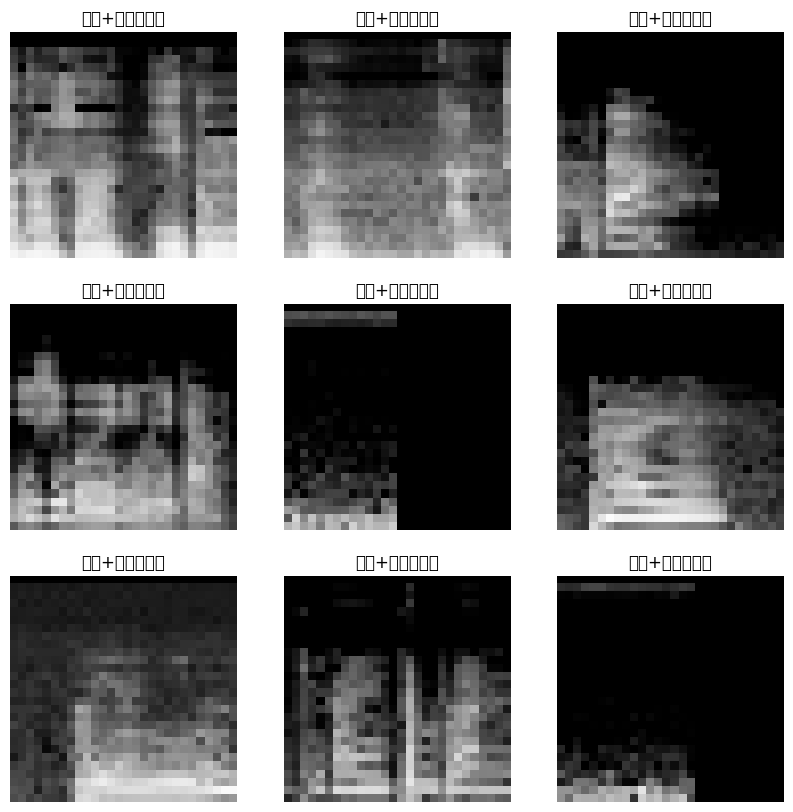

Train class distribution: [ 943. 3938.]
Validation class distribution: [ 315. 1312.]
Test class distribution: [ 314. 1313.]
Train Image batch shape: (32, 28, 28, 3)
Train Label batch shape: (32, 2)


/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/anaconda3/envs/deeplearning/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/iai/

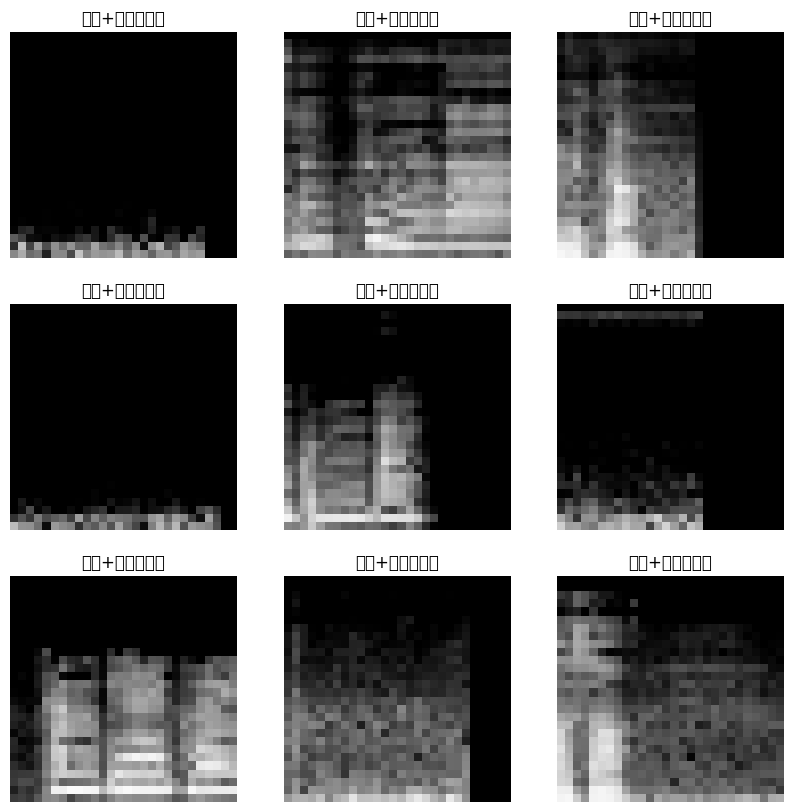

Validation Image batch shape: (32, 28, 28, 3)
Validation Label batch shape: (32, 2)
Test Image batch shape: (32, 28, 28, 3)
Test Label batch shape: (32, 2)


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt

# 데이터 디렉토리 경로
data_dir = "/home/iai/Desktop/son/deeplearningproject/결과"

# 랜덤 시드 고정
random_seed = 42
tf.random.set_seed(random_seed)
np.random.seed(random_seed)

# 데이터 로드
batch_size = 32
img_height = 28
img_width = 28

dataset = image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',  # 레이블을 원-핫 인코딩 형식으로 반환
    batch_size=batch_size
)

# 클래스 비율 확인
class_names = dataset.class_names
print(f"Class names: {class_names}")

class_counts = np.zeros(len(class_names))
for _, labels in dataset:
    class_counts += np.sum(labels.numpy(), axis=0)

print(f"Class distribution: {class_counts}")

# 데이터셋에서 이미지 shape 확인
for images, labels in dataset.take(1):
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()
from sklearn.model_selection import train_test_split
# 데이터셋을 numpy array로 변환
def dataset_to_numpy(dataset):
    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels)

images, labels = dataset_to_numpy(dataset)

# 데이터셋을 3:1:1 비율로 나누기
train_images, temp_images, train_labels, temp_labels = train_test_split(
    images, labels, test_size=0.4, stratify=labels, random_state=random_seed)

val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=0.5, stratify=temp_labels, random_state=random_seed)

# numpy array를 tf.data.Dataset으로 변환
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

# 각 데이터셋의 클래스 비율 확인
def get_class_distribution(labels):
    class_counts = np.sum(labels, axis=0)
    return class_counts

print(f"Train class distribution: {get_class_distribution(train_labels)}")
print(f"Validation class distribution: {get_class_distribution(val_labels)}")
print(f"Test class distribution: {get_class_distribution(test_labels)}")

# 데이터셋에서 이미지 shape 확인
for images, labels in train_dataset.take(1):
    print(f"Train Image batch shape: {images.shape}")
    print(f"Train Label batch shape: {labels.shape}")
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()

for images, labels in val_dataset.take(1):
    print(f"Validation Image batch shape: {images.shape}")
    print(f"Validation Label batch shape: {labels.shape}")

for images, labels in test_dataset.take(1):
    print(f"Test Image batch shape: {images.shape}")
    print(f"Test Label batch shape: {labels.shape}")

Epoch 1/100


2024-05-25 22:16:25.314770: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-05-25 22:16:25.609641: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2024-05-25 22:16:25.984252: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


 28/153 [====>.........................] - ETA: 0s - loss: 0.5211 - accuracy: 0.8114  

2024-05-25 22:16:26.210832: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2024-05-25 22:16:26.240435: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


153/153 [==============================] - 2s 3ms/step - loss: 0.4670 - accuracy: 0.8146 - val_loss: 0.4954 - val_accuracy: 0.8064
Epoch 2/100
153/153 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8476 - val_loss: 0.3684 - val_accuracy: 0.8549
Epoch 3/100
153/153 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8738 - val_loss: 0.3184 - val_accuracy: 0.8734
Epoch 4/100
153/153 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.8976 - val_loss: 0.3104 - val_accuracy: 0.8826
Epoch 5/100
153/153 [==============================] - 0s 2ms/step - loss: 0.2226 - accuracy: 0.9101 - val_loss: 0.2812 - val_accuracy: 0.8949
Epoch 6/100
153/153 [==============================] - 0s 2ms/step - loss: 0.1848 - accuracy: 0.9230 - val_loss: 0.3438 - val_accuracy: 0.8900
Epoch 7/100
153/153 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9373 - val_loss: 0.3888 - val_accuracy: 0.8912
Epoch 8/100

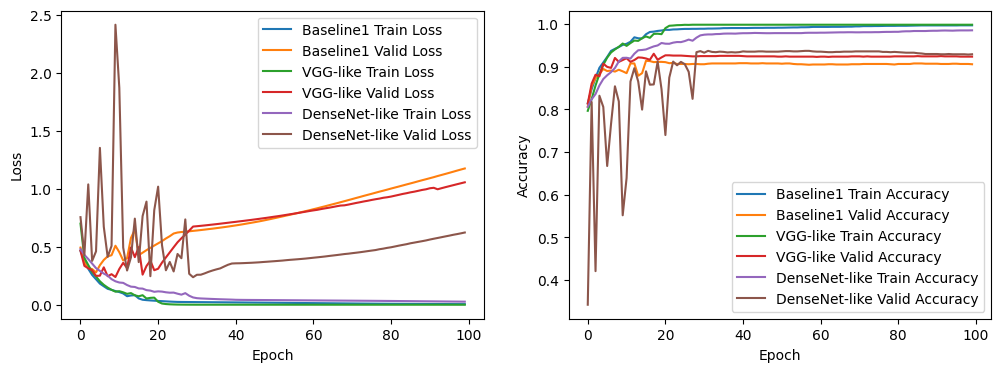

: 

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import os

checkpoint_dir = "/home/iai/Desktop/son/deeplearningproject/best_model"

# 모델 정의
def create_baseline1_model():
    model = models.Sequential([
        layers.InputLayer(input_shape=(28, 28, 3)),
        layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.AveragePooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# VGG 모델 정의
def create_vgg_model():
    model = models.Sequential([
        layers.InputLayer(input_shape=(28, 28, 3)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# DenseNet 모델 정의
def create_densenet_model():
    def dense_block(x, blocks, growth_rate):
        for _ in range(blocks):
            x = conv_block(x, growth_rate)
        return x

    def conv_block(x, growth_rate):
        x1 = layers.BatchNormalization()(x)
        x1 = layers.ReLU()(x1)
        x1 = layers.Conv2D(4 * growth_rate, (1, 1), use_bias=False)(x1)
        x1 = layers.BatchNormalization()(x1)
        x1 = layers.ReLU()(x1)
        x1 = layers.Conv2D(growth_rate, (3, 3), padding='same', use_bias=False)(x1)
        x = layers.Concatenate()([x, x1])
        return x

    def transition_block(x, reduction):
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(int(x.shape[-1] * reduction), (1, 1), use_bias=False)(x)
        x = layers.AveragePooling2D((2, 2), strides=2)(x)
        return x

    inputs = layers.Input(shape=(28, 28, 3))
    x = layers.Conv2D(64, (3, 3), padding='same', use_bias=False)(inputs)
    x = dense_block(x, blocks=4, growth_rate=12)
    x = transition_block(x, reduction=0.5)
    x = dense_block(x, blocks=4, growth_rate=12)
    x = transition_block(x, reduction=0.5)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(2, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



def train_and_evaluate_model(model, train_dataset, val_dataset, test_dataset,model_name):
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)
    checkpoint_path_ensemble = os.path.join(checkpoint_dir, f"best_model_ensemble2_{model_name}.h5")
    checkpoint_ensemble = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_ensemble, monitor='val_loss', save_best_only=True, mode='min')

    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=100,
        batch_size=20,
        callbacks=[checkpoint_ensemble,reduce_lr],
        verbose=1
    )

    model.load_weights(checkpoint_path_ensemble)

    loss, accuracy = model.evaluate(test_dataset)
    print(f"Test loss: {loss}")
    print(f"Test accuracy: {accuracy}")

    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_pred = model.predict(test_dataset)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)

    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)
    return history, report, y_pred, y_true_classes

def calculate_ece(y_true, y_prob, n_bins=10):
    bins = np.linspace(0.0, 1.0, n_bins + 1)
    bin_indices = np.digitize(np.max(y_prob, axis=1), bins) - 1
    ece = 0.0
    for i in range(n_bins):
        bin_mask = bin_indices == i
        bin_size = np.sum(bin_mask)
        if bin_size > 0:
            bin_accuracy = np.mean(y_true[bin_mask] == np.argmax(y_prob[bin_mask], axis=1))
            bin_confidence = np.mean(np.max(y_prob[bin_mask], axis=1))
            ece += np.abs(bin_accuracy - bin_confidence) * bin_size / len(y_true)
    return ece

def calculate_oe(y_true, y_prob, n_bins=10):
    bins = np.linspace(0.0, 1.0, n_bins + 1)
    bin_indices = np.digitize(np.max(y_prob, axis=1), bins) - 1
    oe = 0.0
    for i in range(n_bins):
        bin_mask = bin_indices == i
        bin_size = np.sum(bin_mask)
        if bin_size > 0:
            bin_accuracy = np.mean(y_true[bin_mask] == np.argmax(y_prob[bin_mask], axis=1))
            bin_confidence = np.mean(np.max(y_prob[bin_mask], axis=1))
            if bin_confidence > bin_accuracy:
                oe += (bin_confidence - bin_accuracy) * bin_size / len(y_true)
    return oe

# 모델 1 (Baseline1)
model1 = create_baseline1_model()
history1, report1, y_pred1, y_true_classes = train_and_evaluate_model(model1, train_dataset, val_dataset, test_dataset ,"baseline1")

# 모델 2 (VGG)
model2 = create_vgg_model()
history2, report2, y_pred2, _ = train_and_evaluate_model(model2, train_dataset, val_dataset, test_dataset, "vgg")

# 모델 3 (DenseNet)
model3 = create_densenet_model()
history3, report3, y_pred3, _ = train_and_evaluate_model(model3, train_dataset, val_dataset, test_dataset, "densenet")

# 모델의 검증 정확도
accuracy1 = history1.history['val_accuracy'][-1]  # Baseline1 모델의 검증 정확도
accuracy2 = history2.history['val_accuracy'][-1]  # VGG 모델의 검증 정확도
accuracy3 = history3.history['val_accuracy'][-1]  # DenseNet 모델의 검증 정확도

# 가중치 계산
total_accuracy = accuracy1 + accuracy2 + accuracy3
weights = [accuracy1 / total_accuracy, accuracy2 / total_accuracy, accuracy3 / total_accuracy]

print(f"Calculated weights: {weights}")

# 가중 평균 계산
y_pred_ensemble_weighted = (weights[0] * y_pred1 + weights[1] * y_pred2 + weights[2] * y_pred3) / sum(weights)
y_pred_classes_ensemble_weighted = np.argmax(y_pred_ensemble_weighted, axis=1)

# 앙상블 분류 보고서 생성
report_ensemble_weighted = classification_report(y_true_classes, y_pred_classes_ensemble_weighted, target_names=class_names, output_dict=True)
accuracy_ensemble_weighted = report_ensemble_weighted['accuracy']
recall_ensemble_weighted = report_ensemble_weighted['weighted avg']['recall']
precision_ensemble_weighted = report_ensemble_weighted['weighted avg']['precision']
f1_score_ensemble_weighted = report_ensemble_weighted['weighted avg']['f1-score']

print(f"Weighted Ensemble Accuracy: {accuracy_ensemble_weighted}")
print(f"Weighted Ensemble Recall: {recall_ensemble_weighted}")
print(f"Weighted Ensemble Precision: {precision_ensemble_weighted}")
print(f"Weighted Ensemble F1-score: {f1_score_ensemble_weighted}")

# ECE와 OE 계산
ece_ensemble_weighted = calculate_ece(y_true_classes, y_pred_ensemble_weighted)
oe_ensemble_weighted = calculate_oe(y_true_classes, y_pred_ensemble_weighted)

print(f"Weighted Ensemble ECE: {ece_ensemble_weighted}")
print(f"Weighted Ensemble OE: {oe_ensemble_weighted}")

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Baseline1 Train Loss')
plt.plot(history1.history['val_loss'], label='Baseline1 Valid Loss')
plt.plot(history2.history['loss'], label='VGG-like Train Loss')
plt.plot(history2.history['val_loss'], label='VGG-like Valid Loss')
plt.plot(history3.history['loss'], label='DenseNet-like Train Loss')
plt.plot(history3.history['val_loss'], label='DenseNet-like Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Baseline1 Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Baseline1 Valid Accuracy')
plt.plot(history2.history['accuracy'], label='VGG-like Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='VGG-like Valid Accuracy')
plt.plot(history3.history['accuracy'], label='DenseNet-like Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='DenseNet-like Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
